# Homework 2: LeNET and AlexNet Model Training
## Course : Real-Time Machine Learning 5106
### Name : Lasya Vadlamudi
### Student ID : 801318796


In [1]:
!pip install d2l==1.0.0-beta0

import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime
from matplotlib import pyplot as plt

import torch
from torch import nn
from d2l import torch as d2l

!pip install ptflops
import ptflops
from ptflops import get_model_complexity_info

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 32.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.6/155.6 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.7 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616821 sha256=f38aa276165db64b280cfa0220f461c4ccd8548a7822b4a6c54368c2dc5b3705
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstal

In [2]:
def init_cnn(module):
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)


In [3]:
#@d2l.add_to_class(d2l.Trainer)  
def __init__(self, max_epochs, num_gpus=1, gradient_clip_val=0):
        self.save_hyperparameters()
        self.train_loss = []
        self.train_acc = []
        self.valid_loss = []
        self.valid_acc = []

        assert num_gpus == 1,'No GPU support yet'
        

In [4]:
@d2l.add_to_class(d2l.Classifier)  
def layer_summary(self, X_shape):
    X = torch.randn(*X_shape)
    for layer in self.net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape:\t', X.shape)



In [5]:
#@d2l.add_to_class(d2l.Module)  
def training_step(self, batch):
  l = self.loss(self(*batch[:-1]), batch[-1])
  self.plot('loss', l, train=True)
  self.train_loss.append(l)
  return l

#@d2l.add_to_class(d2l.Module)  
def validation_step(self, batch):
  l = self.loss(self(*batch[:-1]), batch[-1])
  self.valid_loss.append(l)
  self.plot('loss', l, train=False)

In [6]:
#@d2l.add_to_class(d2l.Module)  
def plot(self, key, value, train):
        """Plot a point in animation."""
        assert hasattr(self, 'trainer'), 'Trainer is not inited'
        self.board.xlabel = 'epoch'
        if train:
            x = self.trainer.train_batch_idx / \
                self.trainer.num_train_batches
            n = self.trainer.num_train_batches / \
                self.plot_train_per_epoch
            metric_type = 'train'
        else:
            x = self.trainer.epoch + 1
            n = self.trainer.num_val_batches / \
                self.plot_valid_per_epoch
            metric_type = 'val'
        self.board.draw(x, d2l.numpy(d2l.to(value, d2l.cpu())),
                        ('train_' if train else 'val_') + key,
                        every_n=int(n))
        
        if not train and self.trainer.epoch % 1 == 0:
          train_loss = self.trainer.train_loss[-1]
          #train_acc = self.trainer.train_acc[-1]
          val_loss = self.trainer.valid_loss[-1]
          #val_acc = self.trainer.valid_acc[-1]
          print(f"Epoch [{self.trainer.epoch+1}/{self.trainer.epochs}]: "
                f"train_loss = {train_loss:.4f}, train_acc = {train_acc:.4f}, ")
               # f"val_loss = {val_loss:.4f}, val_acc = {val_acc:.4f}")

In [7]:
#@d2l.add_to_class(d2l.Trainer)  
def fit(self, model, data):
        self.prepare_data(data)
        self.prepare_model(model)
        self.optim = model.configure_optimizers()
        self.epoch = 0
        self.train_batch_idx = 0
        self.val_batch_idx = 0
        for self.epoch in range(self.max_epochs):
            self.fit_epoch()
            self.evaluate()

In [8]:
num_epochs = 10
trainer = d2l.Trainer(max_epochs=num_epochs, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



Base Model Built in Class :

In [9]:
class base_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))

In [10]:
model = base_LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


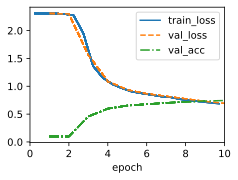

In [11]:
model = base_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [17]:
print('Baseline Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Baseline Model:
base_LeNet(
  61.71 k, 100.000% Params, 429.34 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 429.34 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.486% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (2): AvgPool2d(0, 0.000% Params, 4.7 KMac, 1.096% MACs, kernel_size=2, stride=2, padding=0)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 56.272% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (5): AvgPool2d(0, 0.000% Params, 1.6 KMac, 0.373% MACs, kernel_size=2, stride=2, padding=0)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.208% MACs, in_features=400, out_features=120, bias=True)
    (8): Sigmoid(0, 0.000% Params, 0.0 Mac, 0.000% MACs, )
    (9): Linear(10.16 k, 16.472% Params, 10.1

Question 1:)
*   Replace the average pooling with max-pooling.
*   Replace the softmax layer with ReLU.



In [18]:
class max_pool_relu_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

In [19]:
model = max_pool_relu_LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


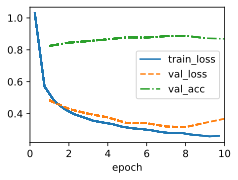

In [20]:
model = max_pool_relu_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [21]:
print('Max Pooling Relu Model:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Max Pooling Relu Model:
max_pool_relu_LeNet(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 1

Conclusion : Replacing softmax layer with ReLU and average pooling with Maxpooling in the LeNet did improve the model performance. We see that the training loss has dropped by a higher value and the validation accuracy has picked up from the second epoch reducing the validation loss.

Question 2:)


1.   Adjust the convolution window size.




In [22]:
class conv_window_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=3), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

In [23]:
model = conv_window_LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 12, 12])
ReLU output shape:	 torch.Size([1, 16, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 16, 6, 6])
Flatten output shape:	 torch.Size([1, 576])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


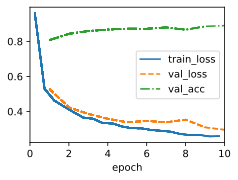

In [24]:
model = conv_window_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [25]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
conv_window_LeNet(
  81.29 k, 100.000% Params, 343.5 KMac, 100.000% MACs, 
  (net): Sequential(
    81.29 k, 100.000% Params, 343.5 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.192% Params, 122.3 KMac, 35.605% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.369% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.369% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(880, 1.083% Params, 126.72 KMac, 36.891% MACs, 6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 2.3 KMac, 0.671% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 2.3 KMac, 0.671% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(69.24 k, 85.177% Params, 69.24 KMac, 20.157% MACs, in_features=576, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 Mac, 0.

Conclusion : Reducing the convolution window size (Kernel Size) didn't result in a major difference/improvement on the LeNet model when compared to the base model.


2.   Adjust number of output channels



In [26]:
class n_output_chan_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(16, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(32, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(256), nn.ReLU(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(num_classes))

In [27]:
model = n_output_chan_LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 16, 28, 28])
ReLU output shape:	 torch.Size([1, 16, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 16, 14, 14])
Conv2d output shape:	 torch.Size([1, 32, 10, 10])
ReLU output shape:	 torch.Size([1, 32, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 32, 5, 5])
Flatten output shape:	 torch.Size([1, 800])
Linear output shape:	 torch.Size([1, 256])
ReLU output shape:	 torch.Size([1, 256])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 10])


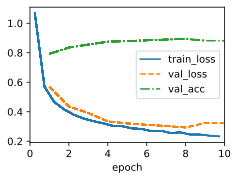

In [28]:
model = n_output_chan_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [29]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
n_output_chan_LeNet(
  250.35 k, 100.000% Params, 1.88 MMac, 100.000% MACs, 
  (net): Sequential(
    250.35 k, 100.000% Params, 1.88 MMac, 100.000% MACs, 
    (0): Conv2d(416, 0.166% Params, 326.14 KMac, 17.364% MACs, 1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 12.54 KMac, 0.668% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 12.54 KMac, 0.668% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12.83 k, 5.126% Params, 1.28 MMac, 68.317% MACs, 16, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 3.2 KMac, 0.170% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 3.2 KMac, 0.170% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(205.06 k, 81.906% Params, 205.06 KMac, 10.917% MACs, in_features=800, out_features=256, bias=True)
    (8): ReLU(0, 0.000% Params, 

Conclusion : Upon increasing the output channels in the first layer to 16 and to 32 in the second layer, the performance of the LeNet model when compared to the base line model has shown a noticable improvement.


3. Adjust number of convolutional layers



In [30]:
class n_conv_layers_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(32, kernel_size=3), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(256), nn.ReLU(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(num_classes))

In [31]:
model = n_conv_layers_LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Conv2d output shape:	 torch.Size([1, 32, 3, 3])
ReLU output shape:	 torch.Size([1, 32, 3, 3])
MaxPool2d output shape:	 torch.Size([1, 32, 1, 1])
Flatten output shape:	 torch.Size([1, 32])
Linear output shape:	 torch.Size([1, 256])
ReLU output shape:	 torch.Size([1, 256])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 10])


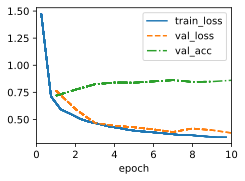

In [32]:
model = n_conv_layers_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [33]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
n_conv_layers_LeNet(
  47.71 k, 100.000% Params, 459.72 KMac, 100.000% MACs, 
  (net): Sequential(
    47.71 k, 100.000% Params, 459.72 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.327% Params, 122.3 KMac, 26.604% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.023% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.023% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 5.064% Params, 241.6 KMac, 52.553% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.348% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.348% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(4.64 k, 9.725% Params, 41.76 KMac, 9.084% MACs, 16, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(0, 0.000% Params, 288.0 Mac, 0.063% MACs, )
    (8): MaxPool2d(0, 0.000% Params, 288.0 Mac, 0.063% MACs, kernel_s

Conclusion : Adding convolutional layers to the baseline LeNet model hasn't shown a major difference in the model performance.

4.   Adjust number of fully connected layers



In [34]:
class n_full_layers_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(64),
            nn.LazyLinear(num_classes))

In [35]:
model = n_full_layers_LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 64])
Linear output shape:	 torch.Size([1, 10])


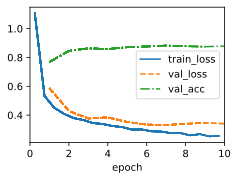

In [36]:
model = n_full_layers_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [37]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
n_full_layers_LeNet(
  66.95 k, 100.000% Params, 441.09 KMac, 100.000% MACs, 
  (net): Sequential(
    66.95 k, 100.000% Params, 441.09 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.233% Params, 122.3 KMac, 27.728% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.066% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.066% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.609% Params, 241.6 KMac, 54.773% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.363% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.363% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 71.879% Params, 48.12 KMac, 10.909% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 M

Conclusion : We added a fully connceted layer with 64 units in this case to check for the model performance. It is observed that the accuracy of the model has reduced when compared to the baseline model. Removing a fully connected layer will show an improvement in the model performance.

5.   Explore the learning rates



In [38]:
class lr_exp_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))

Model Complexity:
lr_exp_LeNet(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 Mac, 0.0

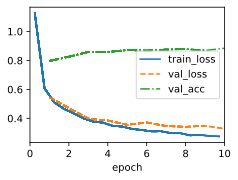

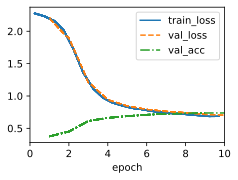

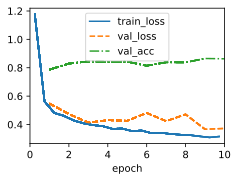

In [39]:
learning_rates = [0.1,0.001,0.5]
for lr_test in learning_rates:
  model = lr_exp_LeNet(lr=lr_test)
  model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
  trainer.fit(model, data)
  print('Model Complexity:')
  macs, params = get_model_complexity_info(model, (1, 28, 28))
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))


Conclusion : Increasing the learning rate has shown an improvement in the model performance.

Question 3.) Add Dropout to all models from Question 2


1.   Adjust convolution window size with Dropout of 0.3




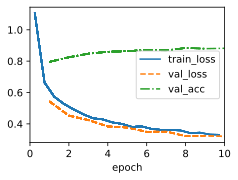

In [40]:
class conv_window_drop_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=3), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(84), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(num_classes))

model = conv_window_drop_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [41]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
conv_window_drop_LeNet(
  81.29 k, 100.000% Params, 343.5 KMac, 100.000% MACs, 
  (net): Sequential(
    81.29 k, 100.000% Params, 343.5 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.192% Params, 122.3 KMac, 35.605% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.369% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.369% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(880, 1.083% Params, 126.72 KMac, 36.891% MACs, 6, 16, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 2.3 KMac, 0.671% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 2.3 KMac, 0.671% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(69.24 k, 85.177% Params, 69.24 KMac, 20.157% MACs, in_features=576, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 Ma

2.   Adjust the number of output channels with Dropout of 0.3



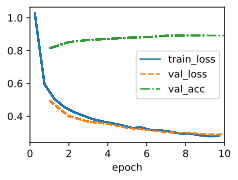

In [42]:
class n_output_chan_drop_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(16, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(32, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(256), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(120), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(num_classes))
        
model = n_output_chan_drop_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [43]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
n_output_chan_drop_LeNet(
  250.35 k, 100.000% Params, 1.88 MMac, 100.000% MACs, 
  (net): Sequential(
    250.35 k, 100.000% Params, 1.88 MMac, 100.000% MACs, 
    (0): Conv2d(416, 0.166% Params, 326.14 KMac, 17.364% MACs, 1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 12.54 KMac, 0.668% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 12.54 KMac, 0.668% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(12.83 k, 5.126% Params, 1.28 MMac, 68.317% MACs, 16, 32, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 3.2 KMac, 0.170% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 3.2 KMac, 0.170% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(205.06 k, 81.906% Params, 205.06 KMac, 10.917% MACs, in_features=800, out_features=256, bias=True)
    (8): ReLU(0, 0.000% Par

3.   Adjust the number of convolution layers with Dropout of 0.3



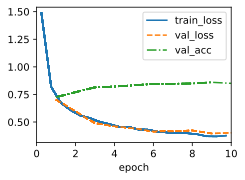

In [44]:
class n_conv_layers_drop_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(32, kernel_size=3), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(256), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(120), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(num_classes))
        
model = n_conv_layers_drop_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [45]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
n_conv_layers_drop_LeNet(
  47.71 k, 100.000% Params, 459.72 KMac, 100.000% MACs, 
  (net): Sequential(
    47.71 k, 100.000% Params, 459.72 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.327% Params, 122.3 KMac, 26.604% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.023% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.023% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 5.064% Params, 241.6 KMac, 52.553% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.348% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.348% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(4.64 k, 9.725% Params, 41.76 KMac, 9.084% MACs, 16, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(0, 0.000% Params, 288.0 Mac, 0.063% MACs, )
    (8): MaxPool2d(0, 0.000% Params, 288.0 Mac, 0.063% MACs, ker

4.   Adjust the number of fully connected layers with Dropout of 0.3



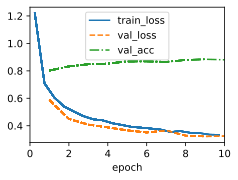

In [46]:
class n_full_layers_drop_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(84), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(64),
            nn.Dropout(0.3),
            nn.LazyLinear(num_classes))
        
model = n_full_layers_drop_LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)


In [47]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
n_full_layers_drop_LeNet(
  66.95 k, 100.000% Params, 441.09 KMac, 100.000% MACs, 
  (net): Sequential(
    66.95 k, 100.000% Params, 441.09 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.233% Params, 122.3 KMac, 27.728% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.066% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.066% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.609% Params, 241.6 KMac, 54.773% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.363% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.363% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 71.879% Params, 48.12 KMac, 10.909% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 12

5.   Explore the learning rates with Dropout of 0.3



Model Complexity:
lr_exp_drop_LeNet(
  61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
  (net): Sequential(
    61.71 k, 100.000% Params, 435.85 KMac, 100.000% MACs, 
    (0): Conv2d(156, 0.253% Params, 122.3 KMac, 28.061% MACs, 1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(0, 0.000% Params, 4.7 KMac, 1.079% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 4.7 KMac, 1.079% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(2.42 k, 3.915% Params, 241.6 KMac, 55.432% MACs, 6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.6 KMac, 0.367% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.6 KMac, 0.367% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(0, 0.000% Params, 0.0 Mac, 0.000% MACs, start_dim=1, end_dim=-1)
    (7): Linear(48.12 k, 77.983% Params, 48.12 KMac, 11.040% MACs, in_features=400, out_features=120, bias=True)
    (8): ReLU(0, 0.000% Params, 120.0 Mac

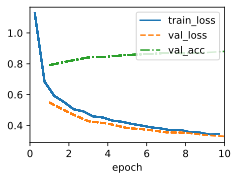

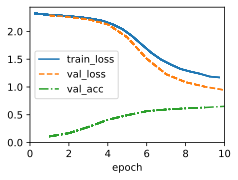

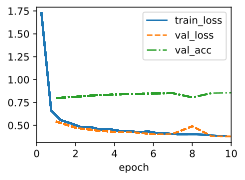

In [48]:
class lr_exp_drop_LeNet(d2l.Classifier):  
    """The LeNet-5 model."""
    def __init__(self, lr, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(84), nn.ReLU(),
            nn.Dropout(0.3),
            nn.LazyLinear(num_classes))


learning_rates = [0.1,0.001,0.5]
for lr_test in learning_rates:
  model = lr_exp_drop_LeNet(lr=lr_test)
  model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
  trainer.fit(model, data)
  print('Model Complexity:')
  macs, params = get_model_complexity_info(model, (1, 28, 28))
  print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
  print('{:<30}  {:<8}'.format('Number of parameters: ', params))


Conclusion : Applying a Dropout of 0.3 has resulted in a better model compared to the best model from the previous problem.

Question 4:) AlexNet

In [49]:
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))

Baseline Model built during Lecture:

In [50]:
class baseline_AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [51]:
baseline_AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

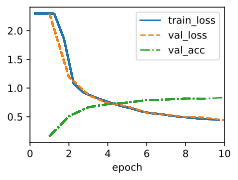

In [52]:
model = baseline_AlexNet(lr=0.01)
trainer.fit(model, data)

In [53]:
print('Baseline AlexNet Model:')
macs, params = get_model_complexity_info(model, (1, 224, 224))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))


Baseline AlexNet Model:
baseline_AlexNet(
  46.76 M, 100.000% Params, 939.85 MMac, 100.000% MACs, 
  (net): Sequential(
    46.76 M, 100.000% Params, 939.85 MMac, 100.000% MACs, 
    (0): Conv2d(11.71 k, 0.025% Params, 34.15 MMac, 3.634% MACs, 1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 279.94 KMac, 0.030% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 279.94 KMac, 0.030% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(614.66 k, 1.314% Params, 415.51 MMac, 44.210% MACs, 96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(0, 0.000% Params, 173.06 KMac, 0.018% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 173.06 KMac, 0.018% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(885.12 k, 1.893% Params, 127.46 MMac, 13.561% MACs, 256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(0, 0.000% Params, 55.3 KMac, 0.006% MACs, )
    (

Simplied AlexNet Model thereby maintaining High Accuracy

In [54]:
class simplified_AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(64, kernel_size=3, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(128, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(512), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [55]:
simplified_AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 64, 224, 224])
ReLU output shape:	 torch.Size([1, 64, 224, 224])
MaxPool2d output shape:	 torch.Size([1, 64, 111, 111])
Conv2d output shape:	 torch.Size([1, 128, 111, 111])
ReLU output shape:	 torch.Size([1, 128, 111, 111])
MaxPool2d output shape:	 torch.Size([1, 128, 55, 55])
Conv2d output shape:	 torch.Size([1, 256, 55, 55])
ReLU output shape:	 torch.Size([1, 256, 55, 55])
Conv2d output shape:	 torch.Size([1, 256, 55, 55])
ReLU output shape:	 torch.Size([1, 256, 55, 55])
Conv2d output shape:	 torch.Size([1, 128, 55, 55])
ReLU output shape:	 torch.Size([1, 128, 55, 55])
MaxPool2d output shape:	 torch.Size([1, 128, 27, 27])
Flatten output shape:	 torch.Size([1, 93312])
Linear output shape:	 torch.Size([1, 512])
ReLU output shape:	 torch.Size([1, 512])
Dropout output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


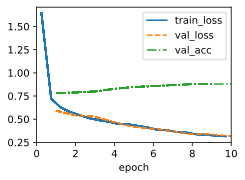

In [56]:
model = simplified_AlexNet(lr=0.01)
trainer.fit(model, data)

In [57]:
print('Simplified AlexNet Model:')
macs, params = get_model_complexity_info(model, (1, 224, 224))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))


Simplified AlexNet Model:
simplified_AlexNet(
  49.04 M, 100.000% Params, 4.57 GMac, 100.000% MACs, 
  (net): Sequential(
    49.04 M, 100.000% Params, 4.57 GMac, 100.000% MACs, 
    (0): Conv2d(640, 0.001% Params, 32.11 MMac, 0.702% MACs, 1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(0, 0.000% Params, 3.21 MMac, 0.070% MACs, )
    (2): MaxPool2d(0, 0.000% Params, 3.21 MMac, 0.070% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(73.86 k, 0.151% Params, 909.98 MMac, 19.903% MACs, 64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(0, 0.000% Params, 1.58 MMac, 0.034% MACs, )
    (5): MaxPool2d(0, 0.000% Params, 1.58 MMac, 0.034% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(295.17 k, 0.602% Params, 892.88 MMac, 19.529% MACs, 128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(0, 0.000% Params, 774.4 KMac, 0.017% MACs, )
    (8): Conv2d(590

Conclusion : The Simplified AlexNet has shown a great reduce in the validation and training loss thereby increasing the accuracy. The simplified AlexNet model has also shown better model performance compared to the best models in Problem 2 and 3.

Problem 5: Model with better accuracy than AlexNet


In [63]:
data = d2l.FashionMNIST(batch_size=128)

In [64]:
def vgg_block(num_convs, out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.LazyConv2d(out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [65]:
class VGG(d2l.Classifier):
    def __init__(self, arch, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        conv_blks = []
        for (num_convs, out_channels) in arch:
            conv_blks.append(vgg_block(num_convs, out_channels))
        self.net = nn.Sequential(
            *conv_blks, 
            nn.Flatten(),
            nn.LazyLinear(768), 
            nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.LazyLinear(512), nn.ReLU(),
            nn.Dropout(0.3),
            
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [81]:
VGG(arch=(((1, 16), (1, 32), (2, 64), (2, 128)))).layer_summary(
    (1, 1, 28, 28))

Sequential output shape:	 torch.Size([1, 16, 14, 14])
Sequential output shape:	 torch.Size([1, 32, 7, 7])
Sequential output shape:	 torch.Size([1, 64, 3, 3])
Sequential output shape:	 torch.Size([1, 128, 1, 1])
Flatten output shape:	 torch.Size([1, 128])
Linear output shape:	 torch.Size([1, 768])
ReLU output shape:	 torch.Size([1, 768])
Dropout output shape:	 torch.Size([1, 768])
Linear output shape:	 torch.Size([1, 512])
ReLU output shape:	 torch.Size([1, 512])
Dropout output shape:	 torch.Size([1, 512])
Linear output shape:	 torch.Size([1, 10])


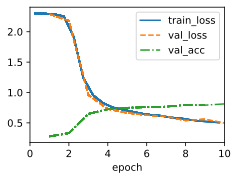

In [82]:
model = VGG(arch=(((1, 16), (1, 32), (2, 64), (2, 128))), lr=0.01)
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128, resize=(28, 28))
model.apply_init([next(iter(data.get_dataloader(True)))[0]], d2l.init_cnn)
trainer.fit(model, data)

In [83]:
print('Model Complexity:')
macs, params = get_model_complexity_info(model, (1, 28, 28))
print('{:<30}  {:<8}'.format('Computational complexity: ', macs))
print('{:<30}  {:<8}'.format('Number of parameters: ', params))

Model Complexity:
VGG(
  779.59 k, 100.000% Params, 6.29 MMac, 100.000% MACs, 
  (net): Sequential(
    779.59 k, 100.000% Params, 6.29 MMac, 100.000% MACs, 
    (0): Sequential(
      160, 0.021% Params, 150.53 KMac, 2.392% MACs, 
      (0): Conv2d(160, 0.021% Params, 125.44 KMac, 1.993% MACs, 1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(0, 0.000% Params, 12.54 KMac, 0.199% MACs, )
      (2): MaxPool2d(0, 0.000% Params, 12.54 KMac, 0.199% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      4.64 k, 0.595% Params, 921.98 KMac, 14.650% MACs, 
      (0): Conv2d(4.64 k, 0.595% Params, 909.44 KMac, 14.451% MACs, 16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(0, 0.000% Params, 6.27 KMac, 0.100% MACs, )
      (2): MaxPool2d(0, 0.000% Params, 6.27 KMac, 0.100% MACs, kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      55.42 k, 7.109% Params, 

Conclusion : VGG model has shown better accuracy than the AlexNet model on the 28*28 images along with lower theoretical complexity.